# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import pandas as pd
from scipy.interpolate import interp1d
# from gw_analysis_functions import *
import scipy as sc
import h5py
from analysis import analysis
from analysis import *
import time as tm

# Load Data

Load the data file with the following code. Verbose = True will print out the input parameters for the data file as well as progress in loading data. Files with large data array can take minutes to load...

In [2]:
# name of file stored in gravitywaveslagrangian.jl/data/
filename = "Eda_test_insprial_data.h5"
# create an anlysis object
test = analysis(filename, verbose=True)

Input parameters loaded into dictionary 'inputs.'
Inputs =  {'D': 100000.0, 'Mbh': 100000.0, 'Mc': 1000.0, 'Run_name': b'Eda_test', 'a_final': 3.0, 'a_initial': 100.0, 'coulombLog': 3.0, 'dfModel': b'Relativistic', 'dmModel': b'Relativistic', 'dt': 0.05, 'dynamicalFriction': 1, 'e0': 0.0, 'gwEmission': 1, 'lisa_bandwidth': array([1.e-05, 1.e+00]), 'orbital_resolution': 1e-05, 'phi0': 0.0, 'postNewtonian': 1, 'rho0': 2.68698e-13, 'save_orbital_data': 1, 't_max': 1000000.0, 't_start': 0.0, 'time_resolution': 1e-08, 'z_f': 20}
Run parameters loaded into dictionary 'run_report.'
Run report =  {'Evolution': b'Success', 'Final radius [r_isco]': 3.0, 'Partitions': 422, 'Time resolution': 1e-08, 'Time step': 0.05, 'Total steps': 2106294357}
Loading gravity wave data.
Loading orbital data...
Orbital arrays with 2106295 elements loaded in 1 seconds.
Creating dataframe accesible via 'object.characteristic_strain()'.
Creating dataframe accesible via 'object.dephasing()'.
Creating dataframe accesib

obj.info() prints a list of the available attributes and methods of the class. The analysis folder also contains method used internally to compute the strain and other quantities. If you need access to these methods as well use "from analysis import -method-" or "*" for all functions. 

In [3]:
# read all the available attributes and methods with obj.info()
test.info()

['D',
 'Mbh',
 'Mc',
 'characteristic_strain',
 'copy',
 'dephasing',
 'dphi',
 'dr',
 'fgw',
 'filename',
 'frequency',
 'info',
 'inputs',
 'lisa_bandwith',
 'mt',
 'mu',
 'noise_curve',
 'number_of_cycles',
 'orbital_data',
 'partitions',
 'phi',
 'r',
 'risco',
 'run_report',
 'semi_major_axis',
 'strain',
 't']

## Print out the input dictionary used for the run

In [20]:
test.inputs

{'D': 100000.0,
 'Mbh': 100000.0,
 'Mc': 1000.0,
 'Run_name': b'Eda_test',
 'a_final': 3.0,
 'a_initial': 100.0,
 'coulombLog': 3.0,
 'dfModel': b'Relativistic',
 'dmModel': b'Relativistic',
 'dt': 0.05,
 'dynamicalFriction': 1,
 'e0': 0.0,
 'gwEmission': 1,
 'lisa_bandwidth': array([1.e-05, 1.e+00]),
 'orbital_resolution': 1e-05,
 'phi0': 0.0,
 'postNewtonian': 1,
 'rho0': 2.68698e-13,
 'save_orbital_data': 1,
 't_max': 1000000.0,
 't_start': 0.0,
 'time_resolution': 1e-08,
 'z_f': 20}

# Orbital Data

If the orbital data is included in the data file you can access the arrays r, t, dr, phi and dphi as attributed of your object, i.e. obj.r and so on. To check if the orbital data was saved you may check if the bool obj.orbital_data is true...

In [4]:
test.orbital_data

True

## Plot the inspiral as a function of time

Text(0.5, 1.0, 'Inprial from 100 to 3 risco')

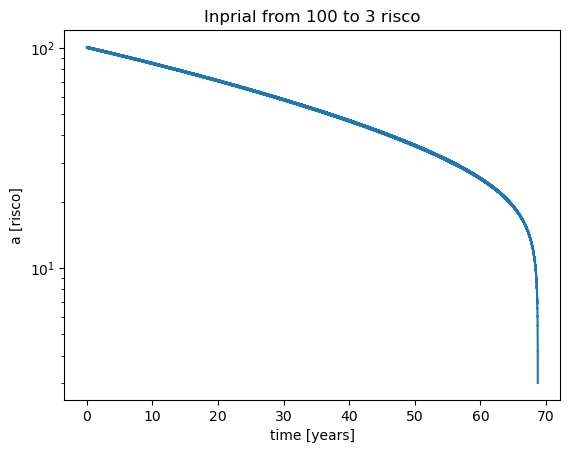

In [5]:
t_year = test.t / year_to_pc # convert from pc back to year
r = test.r / test.risco # in multilples of risco

plt.plot(t_year, r)
plt.yscale('log')
plt.ylabel('a [risco]'); plt.xlabel('time [years]')
plt.title('Inprial from 100 to 3 risco')

## Plot the semi major axis as a function of inspiral time

Text(0.5, 1.0, 'Insprial from 100 to 3 risco')

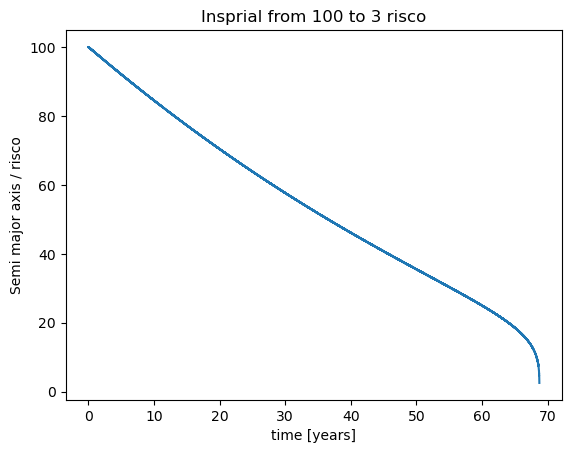

In [6]:
t_year = test.t / year_to_pc # convert from pc back to year
sma = test.semi_major_axis / test.risco # in multilples of risco

plt.plot(t_year, sma)
# plt.yscale('log')
plt.ylabel('Semi major axis / risco'); plt.xlabel('time [years]')
plt.title('Insprial from 100 to 3 risco')

## Number of cycles

Some quantites are saved into pandas dataframes, such as the number or cycles, dephasing, and characteristic strain. The following is an example of how you would load and plot one such dataframe--the number of cycles. 

In [17]:
df = test.number_of_cycles()
print(df)

         frequency [Hz]         Cycles
0          4.534639e+03       0.000000
1          4.534634e+03       0.022672
2          4.534614e+03       0.045340
3          4.534577e+03       0.067999
4          4.534526e+03       0.090644
...                 ...            ...
2106290    1.089653e+06  200685.084780
2106291    1.094585e+06  200688.973194
2106292    1.100338e+06  200692.877316
2106293    1.106887e+06  200696.798379
2106294    1.111907e+06  200700.735970

[2106295 rows x 2 columns]


Text(0.5, 1.0, 'Insprial from 100 to 3 risco')

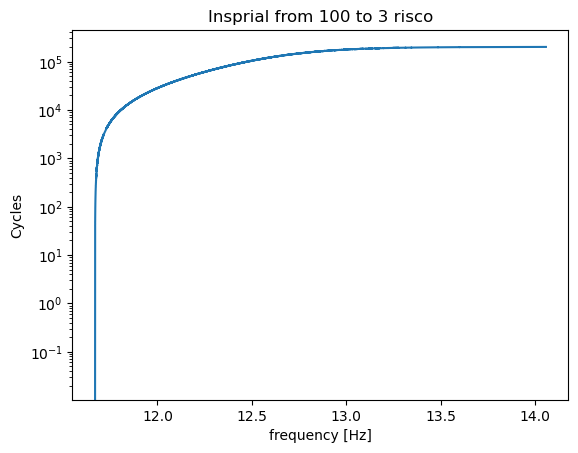

In [18]:
plt.plot(np.log10(df["frequency [Hz]"]/(9.716e-9)), df["Cycles"])
# NOTE: add this scaling to the analysis script...
plt.yscale('log')
# plt.xscale('log')
plt.ylabel(df.columns[1]); plt.xlabel(df.columns[0])
plt.title('Insprial from 100 to 3 risco')

## Dephasing 

In [9]:
df = test.dephasing()
print(df)

         time [yr]        h_+(t)
0         0.000000 -1.521544e-18
1         0.000033 -2.189370e-18
2         0.000065 -2.617780e-18
3         0.000098 -2.043804e-18
4         0.000131 -1.306700e-18
...            ...           ...
2106290  68.743146 -1.074588e-20
2106291  68.743179 -3.263616e-20
2106292  68.743211 -4.884861e-21
2106293  68.743244  1.305186e-20
2106294  68.743277  1.236135e-20

[2106295 rows x 2 columns]


Text(0.5, 1.0, 'Dephasing from 100 to 3 risco')

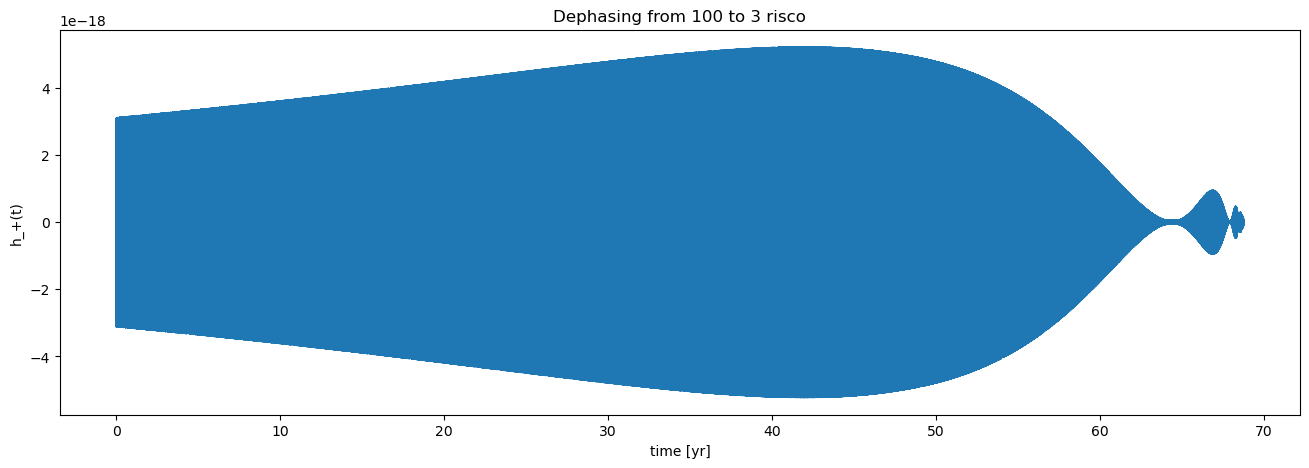

In [10]:
fig, ax = plt.subplots( figsize = (16,5))
ax.plot(df["time [yr]"], df["h_+(t)"])
ax.set_ylabel(df.columns[1]);ax.set_xlabel(df.columns[0])
ax.set_title("Dephasing from 100 to 3 risco")

Zooming is to see the phase

Text(0.5, 1.0, 'Zoomed Phase')

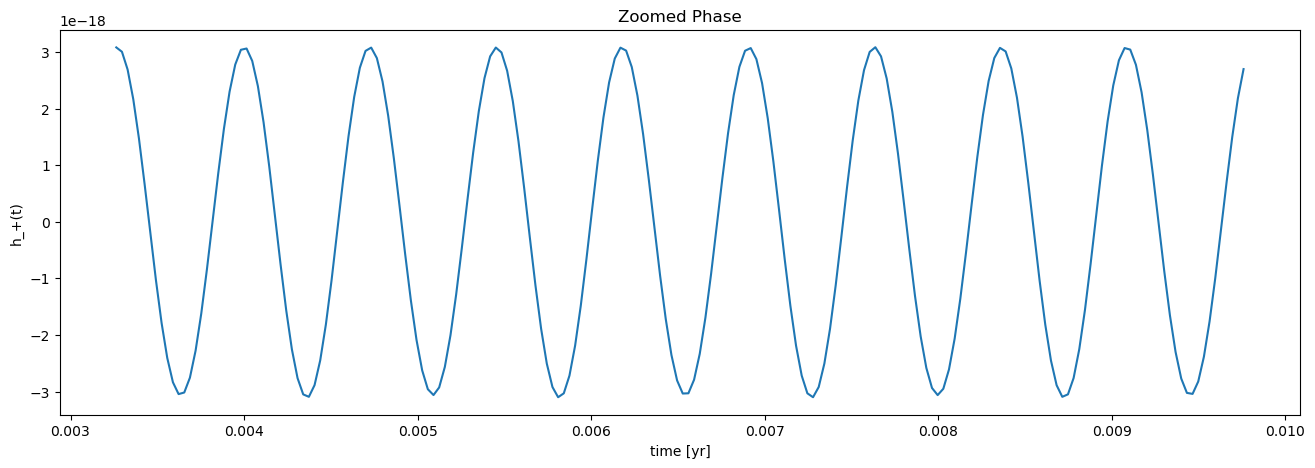

In [11]:
fig, ax = plt.subplots( figsize = (16,5))
ax.plot(df["time [yr]"][100:300], df["h_+(t)"][100:300])
ax.set_ylabel(df.columns[1]);ax.set_xlabel(df.columns[0])
ax.set_title("Zoomed Phase")

## Other orbital quantities

Text(0.5, 1.0, 'Insprial from 100 to 3 risco')

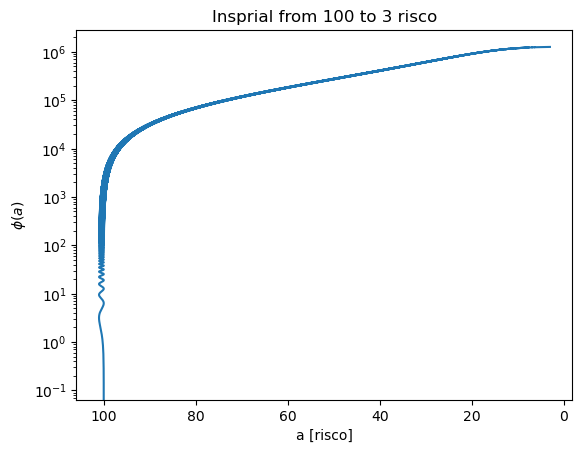

In [19]:
r = test.r / test.risco
phi = test.phi # in multilples of risco

r = r[::-1]
phi = phi[::-1]

fig, ax = plt.subplots()
ax.plot(r, phi)
ax.set_xlim(ax.get_xlim()[::-1])

ax.set_yscale('log')
ax.set_ylabel(r'$\phi(a)$'); plt.xlabel('a [risco]')
ax.set_title('Insprial from 100 to 3 risco')

# Characteristic Strain

In [13]:
df = test.characteristic_strain()
print(df)

             f [Hz]        h_c(f)
0            1100.0  4.999135e-22
1            1120.0  5.187435e-22
2            1140.0  5.381100e-22
3            1160.0  5.572118e-22
4            1180.0  5.771034e-22
...             ...           ...
2499936  49999820.0  8.257376e-20
2499937  49999840.0  8.257379e-20
2499938  49999860.0  8.257382e-20
2499939  49999880.0  8.257386e-20
2499940  49999900.0  8.257389e-20

[2499941 rows x 2 columns]


Text(0.5, 1.0, 'Strain for 100 to 3 risco')

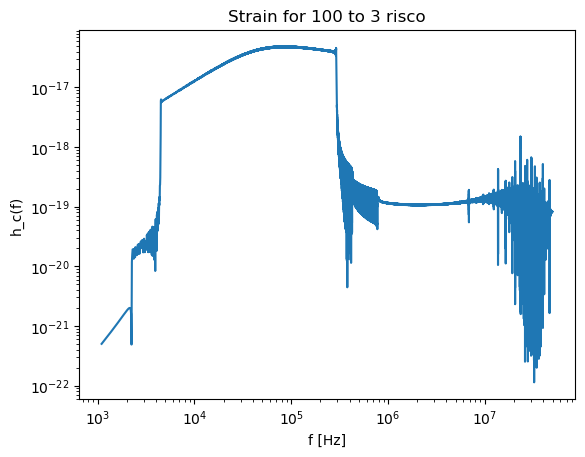

In [14]:
plt.plot(df['f [Hz]'], df['h_c(f)'])
plt.yscale('log'); plt.xscale('log')
plt.ylabel(df.columns[1]); plt.xlabel(df.columns[0]);
plt.title("Strain for 100 to 3 risco")

And adding the elisa noise curve

Text(0.5, 1.0, 'Strain for 100 to 3 risco')

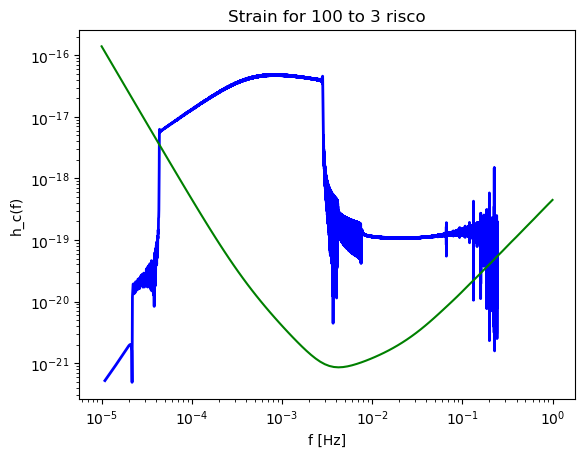

In [15]:
fgw = test.fgw
freq = test.frequency
strain = test.strain
NoiseStrain = test.noise_curve

f_start = int(1)
f_end = int(len(freq)/2)
step = 1

plt.plot(freq[f_start:f_end:step] / hz_to_invpc, strain[f_start:f_end:step], c = 'b',label="Signal", lw=2)
plt.plot(fgw/hz_to_invpc, NoiseStrain, c = 'g',label="LISA noise curve")

plt.yscale('log'); plt.xscale('log')
plt.ylabel(df.columns[1]); plt.xlabel(df.columns[0]);
plt.title("Strain for 100 to 3 risco")